In [1]:
import math
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

$(1 + bp)x = (1 + bp^2)(1 + cp)y$

In [70]:
b = 1
c = 5
system = signal.lti([b, 1], [b*c, b, c, 1]) # (1+bp)x = (1+bp^2)(1+cp)y

---
# Зависимость амплитуды и фазы выходого сигнала от амплитуды входного при постоянной фазе:

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


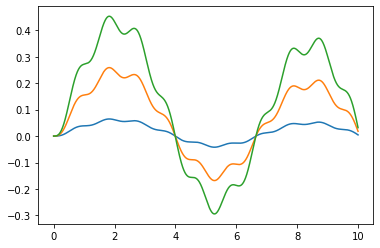

In [72]:
# constant frequency
freq = 1
T= np.linspace(0,10,1e4 + 1)

plt.figure()

for mag in range(1,10,3):
    S = [ mag*math.sin( t*2*math.pi*freq ) for t in T ]
    Tout, yout, xout = signal.lsim(system, S, T)
    plt.plot(Tout, yout)
    
plt.show()        
# судя по графикам амплитуда выходного сигнала увеличивается при увеличении исходной,
# а фаза остаётся неизменной

---
# Зависимость амплитуды и фазы выходого сигнала от фазы входного при постоянной амплитуде:

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


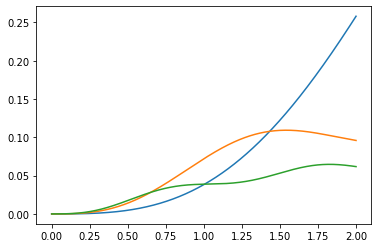

In [98]:
# constant magnitude
mag = 1
T= np.linspace(0,2,1e4 + 1)

plt.figure()

for freq in np.linspace(0.17, 1, 3): # phase = [ 1/3*pi, 7/6*pi, 2*pi ]
    S = [ mag*math.sin( t*2*math.pi*freq ) for t in T ]
    Tout, yout, xout = signal.lsim(system, S, T)
    plt.plot(Tout, yout)
    
plt.show()        
# амплитуда уменьшается
# фаза увеличивается

---
# Сравнение вычисленных АЧХ и ФЧХ с полученными с помощью библиотек питона:

$A(\omega) = {\sqrt{1 + (b\omega)^2}\over|1 - b\omega^2|\sqrt{1 + (c\omega)^2}}$; 
$\phi(\omega) = arctg({(b-c)\omega\over1 + bc\omega^2})$

/home/konstantin/anaconda3/lib/python3.7/site-packages/scipy/signal/filter_design.py:189: RuntimeWarning: divide by zero encountered in true_divide
  h = polyval(b, s) / polyval(a, s)
/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


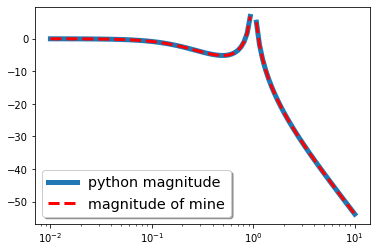

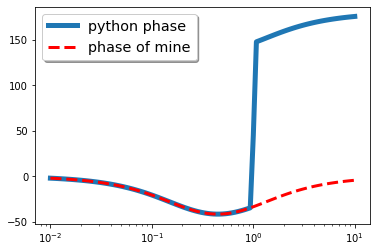

In [115]:
# АЧХ и ФЧХ
w, mag, phase = signal.bode(system)
A = [20*math.log10(math.sqrt(1+(b*t)**2)/( abs(1-b*t**2)*math.sqrt(1+(c*t)**2) ) )  for t in w]
phi = [180/math.pi*(math.atan( (b - c)*t/(1 + b*c*t**2) )) for t in w] # в градусах

_, ax = plt.subplots()
plt.semilogx(w, mag, label='python magnitude', linewidth=5)
plt.semilogx(w, A, 'r--',label='magnitude of mine', linewidth=3)
ax.legend(loc='lower left', shadow=True, fontsize='x-large')

_, ax = plt.subplots()
plt.semilogx(w, phase, label='python phase', linewidth=5)
plt.semilogx(w, phi, 'r--',label='phase of mine', linewidth=3)
ax.legend(loc='upper left', shadow=True, fontsize='x-large')

plt.show()

## АЧХ: Полное совпадение.
## ФЧХ: Видно, что слева от точки разрыва, графики совпадают, а справа - отличаются на $\pi$. Скорее всего в этом виноват физический смысл, который мне неподвластен.
---

# Сравнение переходной функции $h(t)$ с функцией реакции системы на единичное воздействие:

$h(t) = 1 + {bc - c^2\over b + c^2 }e^{-t/c} - {b + bc\over b + c^2}cos({t\over \sqrt{b}}) - \sqrt{b}{c - b\over b + c^2}sin({t\over \sqrt{b}})$

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


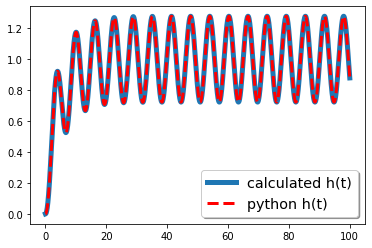

In [95]:
T = np.linspace(0,1e2,1e4 + 1)

# график функции h(t)
coef1 = (b*c - np.square(c))/(b + np.square(c))
coef2 = -(b + b*c)/(b + np.square(c))
coef3 = -math.sqrt(b)*(c - b)/(b + np.square(c))
h = [1 + coef1*math.exp(-t/c) + coef2*math.cos(t/np.sqrt(b)) + coef3*math.sin(t/np.sqrt(b)) for t in T]

# реакция на ступеньку
S = np.ones_like(T)
Tout, yout, xout = signal.lsim(system, S, T)

_, ax = plt.subplots()
plt.plot(T, h, label='calculated h(t)', linewidth=5)
plt.plot(T, yout, 'r--', label='python h(t)', linewidth=3)
ax.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.show()